<a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/Transformers/IMAGE_SEGMENTATION_ZERO_SHOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Segmentación de Imagen Zero-Shot

La segmentación de imágenes es el proceso de dividir una imagen en segmentos o regiones significativas. Puede ser de diferentes tipos, como la segmentación semántica (asignación de etiquetas de clase a píxeles) o la segmentación basada en contornos (división de una imagen en áreas definidas por bordes). Esta técnica es ampliamente utilizada en visión por computadora para analizar y comprender imágenes.

Documentación:

* **Transformers** - https://huggingface.co/docs/transformers/v4.32.1/en/index

* **Modelo CIDAS/ClipSeg-rd64-refined** - https://huggingface.co/CIDAS/clipseg-rd64-refined

* **Papper** - https://arxiv.org/abs/2112.10003

* **Repositorio** - https://huggingface.co/CIDAS/clipseg-rd64-refined

* **Tutorial Apoyo** - https://github.com/NielsRogge/Transformers-Tutorials/blob/master/CLIPSeg/Zero_shot_image_segmentation_with_CLIPSeg.ipynb

* **PIL** - https://pypi.org/project/Pillow/

* **requests** - https://pypi.org/project/requests/

* **timm** - https://pypi.org/project/timm/

* **IO** - https://pypi.org/project/io/

* **PIL** - https://pypi.org/project/Pillow/

* **torch** - https://pypi.org/project/torch/

* **matplotlib** - https://pypi.org/project/matplotlib/

### **Ejemplo**:

>Para nuestro ejemplo utilizaremos el modelo <a href="https://huggingface.co/CIDAS/clipseg-rd64-refined"> CIDAS/clipseg-rd64-refined</a> con dimensionalidad reducida. Fue presentado en el <a href="https://arxiv.org/abs/2112.10003">paper</a> Image Segmentation Using Text and Image Prompts por Timo Lüddecke et al.
>
>Mas información disponible en el repositorio oficial:
>
>https://github.com/timojl/clipseg
>
>Información adicional en el siguiente repositorio:
>https://github.com/NielsRogge/Transformers-Tutorials/blob/master/CLIPSeg/Zero_shot_image_segmentation_with_CLIPSeg.ipynb


*Mas información en:*

https://huggingface.co/CIDAS/clipseg-rd64-refined

https://github.com/NielsRogge/Transformers-Tutorials/blob/master/CLIPSeg/Zero_shot_image_segmentation_with_CLIPSeg.ipynb

In [14]:
#@title **Instalador Principal**

#@markdown # **Importante**
#@markdown **Recuerda instalar primero la librería principal junto con todos sus componentes.**

from IPython.display import clear_output

#Instalar el módulo de entornos virtuales venv de python
!apt install python3.10-venv

#Crear nuestro entorno virtual
!python -m venv .env

#Activamos nuestro entorno virtual
!source .env/bin/activate

#Instalamos todas las dependencias de Transformers necesarias
!pip install transformers
!pip install 'transformers[torch]'
!pip install 'transformers[tf-cpu]'
!pip install 'transformers[flax]'
clear_output()

#Realizamos una prueba para verificar que el código funciona
print("Instalación correcta")

Instalación correcta


Imagen lista
Buscando:
fire, kids, cave, monkeys


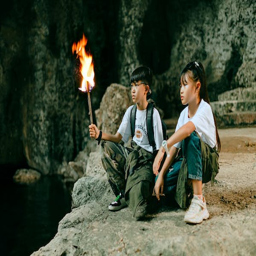

Modelo:	CIDAS/clipseg-rd64-refined
Procesador:	CIDAS/clipseg-rd64-refined


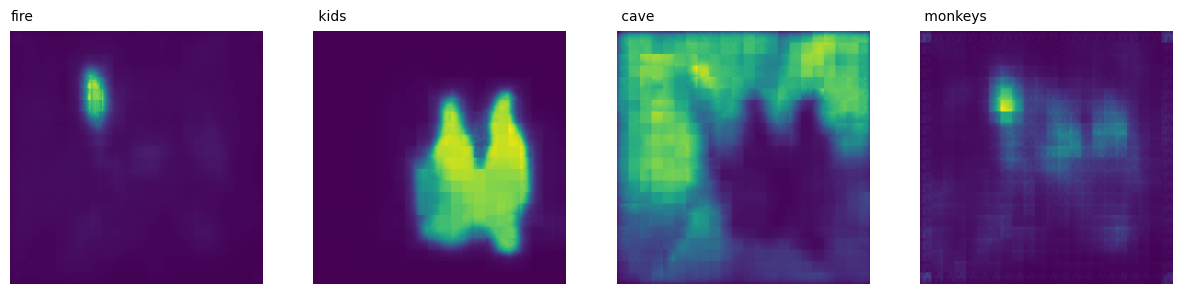

In [29]:
#@title **Ejemplo práctico**
try:
  #@markdown 1. Importamos todas las librerías necesarias
  #@markdown para el procesamiento y detección de objetos
  #@markdown junto con algunas librerías de apoyo
  from transformers import AutoProcessor, CLIPSegForImageSegmentation
  from io import BytesIO
  from PIL import Image
  import torch
  import requests
  import matplotlib.pyplot as plt


  #@markdown 2. Definimos la ruta de nuestra imagen
  nueva_imagen = "https://images.pexels.com/photos/17751969/pexels-photo-17751969/free-photo-of-man-people-woman-girl.jpeg?auto=compress&cs=tinysrgb&w=600" # @param {type:"string"}
  #@markdown 2. Indicamos los objetos a buscar, separados por coma ' , '
  nuevos_prompts = "fire, kids, cave, monkeys" # @param {type:"string"}

  #@markdown 3. Obtenemos la imagen desde internet
  img = requests.get(nueva_imagen, stream=True)
  imagen_prueba = Image.open(img.raw)
  prompts = nuevos_prompts.split(',')
  print(f"Imagen lista\nBuscando:\n{nuevos_prompts}")

  #@markdown *Opcional para previsualizar la imagen descargada*
  display_img = True # @param {type:"boolean"}
  img_show = requests.get(nueva_imagen)
  display(Image.open(BytesIO(img_show.content)).resize((256,256)))

  #@markdown 4. Configuramos nuestro procesador y modelo para detección de objetos
  nombre_procesador = "CIDAS/clipseg-rd64-refined" # @param {type:"string"}
  nombre_modelo = "CIDAS/clipseg-rd64-refined" # @param {type:"string"}
  procesador = AutoProcessor.from_pretrained(nombre_procesador)
  modelo = CLIPSegForImageSegmentation.from_pretrained(nombre_modelo)
  print(f"Modelo:\t{nombre_modelo}\nProcesador:\t{nombre_procesador}")

  #@markdown 5. Procesamos nuestra imagen y obtenemos la predicción
  inputs = procesador(text=prompts, images=[imagen_prueba] * len(prompts), padding=True, return_tensors="pt")
  outputs = modelo(**inputs)
  logits = outputs.logits
  predicciones = outputs.logits.unsqueeze(1)

  # Creamos un espacio para cada uno de los prompts
  _, cajas = plt.subplots(1, len(prompts), figsize=(15, 4))
  # por cada caja, agregamos una predicción
  for indice, caja in enumerate(cajas.flatten()):
    caja.axis('off')
    _img = torch.sigmoid(predicciones[indice][0]).detach().numpy()
    caja.imshow(_img)
    caja.text(0, -15, prompts[indice])

except Exception as error:
  print(f"No es Chems\n{error}")



Realiza la práctica interactiva en Colab: <a href="https://colab.research.google.com/github/coder160/cuadernos/blob/main/Vision_Artificial/Transformers/IMAGE_SEGMENTATION_ZERO_SHOT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>